In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d_t=pd.read_csv('GIRFFT.csv', sep='\t')

In [3]:
d_n=d_t.iloc[:, 1:60]

In [7]:
d_N=d_t.iloc[:, 1:60]
d_I=d_t.iloc[:, 61:120]

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:

X= StandardScaler().fit_transform(X)

In [8]:
X=np.concatenate((d_I, d_N), axis=0)

In [10]:
pca=PCA(n_components=30)
PCA_X=pca.fit_transform(X)

In [10]:
pca.components_.shape

(30, 59)

In [11]:
x_pca=pca.transform(X)

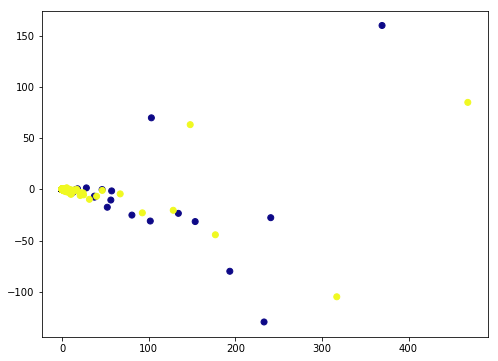

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='plasma')

In [30]:
df_comp=pd.DataFrame(pca.components_, columns=list(d_n.columns.values))
df_comp.head()

,AmplitudeRMSSquare,AmplitudeRMSSquare1,AmplitudeRMSSquare2,AmplitudeRMSSquare3,AmplitudeRMSSquare4,AmplitudeRMSSquare5,AmplitudeRMSSquare6,AmplitudeRMSSquare7,AmplitudeRMSSquare8,AmplitudeRMSSquare9,...,AmplitudeRMSSquare49,AmplitudeRMSSquare50,AmplitudeRMSSquare51,AmplitudeRMSSquare52,AmplitudeRMSSquare53,AmplitudeRMSSquare54,AmplitudeRMSSquare55,AmplitudeRMSSquare56,AmplitudeRMSSquare57,AmplitudeRMSSquare58
0,0.125402,0.133392,0.126629,0.122460,0.143503,0.137374,0.132796,0.128662,0.107412,0.123950,...,0.140910,0.132449,0.135238,0.134793,0.122162,0.135131,0.112335,0.131005,0.132005,0.125792
1,-0.247240,0.192878,0.074716,0.065019,-0.058411,0.135615,-0.176815,0.054654,-0.048849,-0.231388,...,-0.121946,0.013697,0.195405,0.119372,-0.028357,0.066558,-0.111093,0.081466,-0.025752,-0.081422
2,0.034134,0.088244,0.169573,0.193865,0.005599,-0.046585,0.124774,-0.079627,-0.129571,0.021720,...,0.098237,0.222552,0.116813,0.028977,0.269972,-0.159232,-0.013537,-0.129256,0.132962,0.253911
3,0.033000,-0.063808,-0.196273,-0.160225,0.084942,-0.106214,0.076289,-0.147282,-0.360012,-0.047088,...,0.028255,-0.035404,-0.028813,0.082088,-0.152761,-0.006654,-0.253122,-0.136306,0.062939,-0.003263
4,0.180078,-0.003622,0.081472,-0.079744,0.048946,0.034161,-0.017528,0.269764,0.033077,0.062316,...,0.168963,0.135516,0.041186,-0.090134,0.095326,-0.009096,-0.003073,0.044762,-0.195859,-0.022323


In [31]:
import seaborn as sns

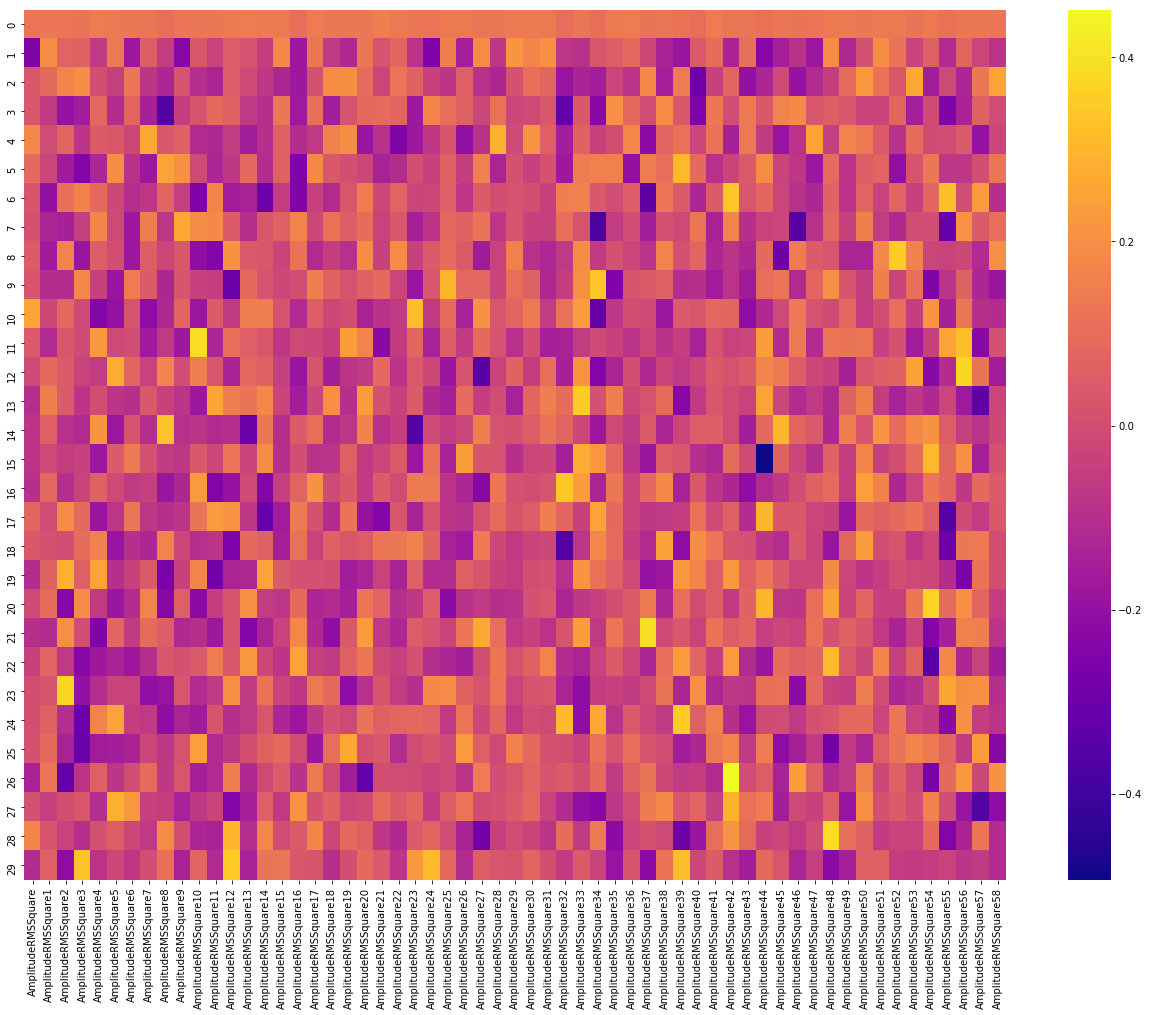

In [32]:
plt.figure(figsize=(22,16))
sns.heatmap(df_comp, cmap='plasma')

In [8]:
X=np.concatenate((PCA_N, PCA_I), axis=0)

In [11]:
a=np.array(['Normal']*10000)
b=np.array(['Ischemic']*10000)
y=np.concatenate((a,b), axis=0)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_X, test_X, train_y, test_y = train_test_split(PCA_X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
from sklearn.svm import SVC

In [15]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred_y = svclassifier.predict(test_X)  

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [19]:
print(accuracy_score(test_y, pred_y))
print(classification_report(test_y, pred_y))

0.4955
             precision    recall  f1-score   support

   Ischemic       0.50      1.00      0.66      1981
     Normal       0.60      0.00      0.00      2019

avg / total       0.55      0.50      0.33      4000



In [ ]:
d_X = X[:, :2] 

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf')
clf = model.fit(d_X, d_y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature1')
ax.set_xlabel('Feature')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()